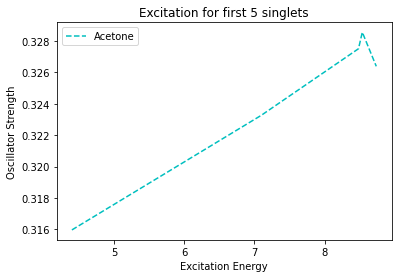

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve1d
from scipy.stats import norm

# List of filenames
###file_names = ["water.txt", "imidazole.txt", "formaldehyde.txt", "acetone.txt"]
file_names = ["acetone.txt"]
# Create a figure and axis
fig, ax = plt.subplots()

# Define a set of colors and labels to cycle through
##colors = ['b', 'g', 'r', 'c']
##labels = ['Water', 'Imidazole', 'Formaldehyde', 'Acetone']
colors = ['c']
labels = ['Acetone']
# Iterate over each file
for i, file_name in enumerate(file_names):
    # Load data from the current file
    data = np.loadtxt(file_name)

    # Extract energy and oscillator strength columns
    energy = data[:, 0]
    oscillator_strength = data[:, 1]

    # Define the Gaussian kernel
    sigma = 0.1  # Adjust the sigma value as needed
    gaussian_kernel = norm.pdf(np.arange(-3 * sigma, 3 * sigma, 0.01), scale=sigma)

    # Convolve the oscillator strength with the Gaussian kernel
    convoluted_spectrum = convolve1d(oscillator_strength, gaussian_kernel, mode='constant', cval=0.0)

    # Plot the convoluted spectrum from the current file with a different color and label
    ax.plot(energy, convoluted_spectrum, label=labels[i], linestyle='dashed', color=colors[i])

# Set labels and title
ax.set_xlabel("Excitation Energy")
ax.set_ylabel("Oscillator Strength")
ax.set_title("Excitation for first 5 singlets")

# Set y-axis range from 0 to 0.5
#ax.set_ylim(0, 0.5)

# Add legend
ax.legend()
plt.savefig("Acetone.pdf")

# Show the plot
plt.show()

